# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing as sk_pp
from sklearn.model_selection import train_test_split

%matplotlib inline

## Get Data

In [2]:
data = pd.read_csv('../../../Data_AA2/bank-additional-full.csv', sep = ';',na_values="unknown")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.dropna(inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [5]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
def age(df):
    df.loc[df['age'] <= 19, 'age'] = 1
    df.loc[(df['age'] > 19) & (df['age'] <= 30), 'age'] = 2
    df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age'] = 3
    df.loc[(df['age'] > 60) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,3,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['job'] = le.fit_transform(data['job']) 
data['marital'] = le.fit_transform(data['marital']) 
data['education'] = le.fit_transform(data['education']) 
data['default'] = le.fit_transform(data['default']) 
data['housing'] = le.fit_transform(data['housing']) 
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact']) 
data['month'] = le.fit_transform(data['month']) 
data['day_of_week'] = le.fit_transform(data['day_of_week'])
data['poutcome'] = le.fit_transform(data['poutcome'])

data['y'].replace(['no', 'yes'], [0,1], inplace  = True)
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,3,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,2,9,2,5,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
11,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
12,2,1,2,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
13,3,3,0,0,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
from sklearn.model_selection import train_test_split

data_Y = data['y']
data = data.drop(columns=['y']) 

X_train, X_test, Y_train, Y_test = train_test_split( data, data_Y, test_size=0.30)

#Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
#Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-1.839689,0.911924,1.298847,-0.424793,-0.006845,0.916028,-0.431896,-0.697610,-0.524263,1.413977,-1.273453,-0.566388,0.213215,-0.370569,0.189463,0.918158,0.679970,-0.437133,0.848820,0.898681
1,0.403145,-0.750352,-0.309712,-0.424793,-0.006845,0.916028,-0.431896,1.433466,-1.361209,-1.436416,-1.273453,-0.566388,0.213215,-0.370569,0.189463,-1.004930,0.865906,0.479805,-1.442455,-2.248905
2,0.403145,-0.750352,-0.309712,-1.428835,-0.006845,0.916028,-0.431896,1.433466,-0.524263,1.413977,-0.467499,-0.193116,0.213215,-0.370569,0.189463,0.918158,0.679970,-0.437133,0.849383,0.898681
3,0.403145,-0.196260,-0.309712,-1.930857,-0.006845,-1.091670,-0.431896,1.433466,-0.105790,-1.436416,-0.467499,2.793057,0.213215,-0.370569,0.189463,0.918158,1.613064,-0.249578,0.847133,0.898681
4,0.403145,1.466016,-0.309712,0.579250,-0.006845,-1.091670,-0.431896,1.433466,0.731156,-1.436416,0.338455,-0.193116,0.213215,-0.370569,0.189463,0.732053,0.809614,0.875755,0.788642,0.404916
5,0.403145,-1.027398,-0.309712,1.081271,-0.006845,-1.091670,-0.431896,-0.697610,-1.361209,-1.436416,1.950362,0.180155,0.213215,-0.370569,0.189463,-1.749351,-2.248958,1.917730,-1.453141,-1.122961
6,0.403145,-1.027398,1.298847,1.081271,-0.006845,0.916028,-0.431896,-0.697610,-1.361209,-0.011219,-0.467499,-0.566388,0.213215,-0.370569,0.189463,0.918158,-0.128598,0.938274,0.849945,0.898681
7,0.403145,1.466016,-0.309712,0.579250,-0.006845,0.916028,-0.431896,1.433466,0.731156,-1.436416,1.950362,-0.566388,0.213215,-0.370569,0.189463,0.732053,0.809614,0.875755,0.789767,0.404916
8,0.403145,-1.027398,-0.309712,1.081271,-0.006845,-1.091670,-0.431896,-0.697610,-1.361209,-0.723818,-1.273453,0.553427,0.213215,-0.370569,0.189463,0.918158,-0.128598,0.938274,0.850508,0.898681
9,0.403145,-0.473306,-0.309712,1.081271,-0.006845,-1.091670,-0.431896,-0.697610,-1.779683,-0.011219,0.338455,-0.566388,0.213215,1.552659,-2.425887,-1.066965,-0.758053,-1.354071,-1.174183,-0.818185


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21341 entries, 0 to 21340
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             21341 non-null  float64
 1   job             21341 non-null  float64
 2   marital         21341 non-null  float64
 3   education       21341 non-null  float64
 4   default         21341 non-null  float64
 5   housing         21341 non-null  float64
 6   loan            21341 non-null  float64
 7   contact         21341 non-null  float64
 8   month           21341 non-null  float64
 9   day_of_week     21341 non-null  float64
 10  duration        21341 non-null  float64
 11  campaign        21341 non-null  float64
 12  pdays           21341 non-null  float64
 13  previous        21341 non-null  float64
 14  poutcome        21341 non-null  float64
 15  emp.var.rate    21341 non-null  float64
 16  cons.price.idx  21341 non-null  float64
 17  cons.conf.idx   21341 non-null 

In [11]:
Y_train.value_counts()

0    18597
1     2744
Name: y, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE

strategy = {1:5000}
sm = SMOTE(random_state = 2,sampling_strategy=strategy)

X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [13]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_train, Y_train = undersample.fit_resample(X_train, Y_train)

In [14]:
Y_train.value_counts()

1    5000
0    5000
Name: y, dtype: int64

In [15]:
X_val, partial_X_train, Y_val, partial_Y_train = train_test_split( X_train, Y_train, test_size=0.50)

In [16]:
Y_val.value_counts()

0    2509
1    2491
Name: y, dtype: int64

In [17]:
partial_Y_train.value_counts()

1    2509
0    2491
Name: y, dtype: int64

# DNN modelo 1
Defining the model structure

In [18]:
from tensorflow.keras import models, layers

hidden = 16

model = models.Sequential()
model.add(layers.Dense(hidden, activation='relu'))
#model_dr.add(layers.Dropout(0.5))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [20]:
history = model.fit(partial_X_train,
                    partial_Y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, Y_val))

results = model.evaluate(X_test, Y_test, verbose = 0)
print(results)

Epoch 1/20
10/10 [==============================] - 2s 139ms/step - loss: 0.6905 - acc: 0.5516 - val_loss: 0.6570 - val_acc: 0.5946
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.6518 - acc: 0.6070 - val_loss: 0.6334 - val_acc: 0.6424
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 0.6231 - acc: 0.6584 - val_loss: 0.6143 - val_acc: 0.6600
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 0.6126 - acc: 0.6654 - val_loss: 0.5973 - val_acc: 0.6684
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5906 - acc: 0.6803 - val_loss: 0.5825 - val_acc: 0.6800
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5756 - acc: 0.6943 - val_loss: 0.5687 - val_acc: 0.7028
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5656 - acc: 0.7099 - val_loss: 0.5573 - val_acc: 0.7168
Epoch 8/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5492 - acc: 0.

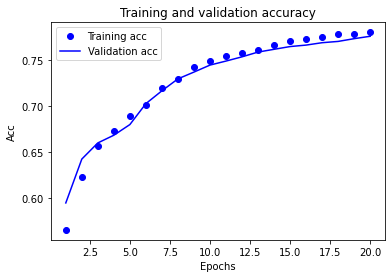

In [21]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# DNN modelo 2
Defining the model structure

In [22]:
from tensorflow.keras import models, layers

hidden = 32

model2 = models.Sequential()
model2.add(layers.Dense(hidden, activation='relu'))
#model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(hidden, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [23]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [24]:
history = model2.fit(partial_X_train,
                    partial_Y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, Y_val))

results = model2.evaluate(X_test, Y_test, verbose = 0)
print(results)

Epoch 1/20
10/10 [==============================] - 1s 23ms/step - loss: 0.6600 - acc: 0.6515 - val_loss: 0.6118 - val_acc: 0.7394
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6022 - acc: 0.7292 - val_loss: 0.5678 - val_acc: 0.7464
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5553 - acc: 0.7480 - val_loss: 0.5354 - val_acc: 0.7482
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5254 - acc: 0.7617 - val_loss: 0.5108 - val_acc: 0.7550
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5076 - acc: 0.7542 - val_loss: 0.4916 - val_acc: 0.7606
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.4818 - acc: 0.7732 - val_loss: 0.4774 - val_acc: 0.7626
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 0.4641 - acc: 0.7801 - val_loss: 0.4662 - val_acc: 0.7744
Epoch 8/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4657 - acc: 0.7

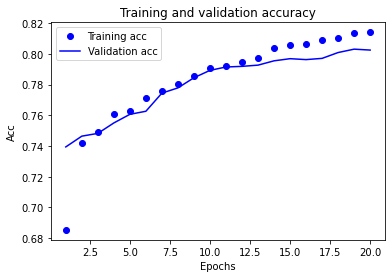

In [25]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# DNN modelo 3
Defining the model structure

In [26]:
from tensorflow.keras import models, layers

hidden = 64

model3 = models.Sequential()
model3.add(layers.Dense(hidden, activation='relu'))
model3.add(layers.Dropout(0.3))
model3.add(layers.Dense(hidden, activation='relu'))
model3.add(layers.Dropout(0.3))
model3.add(layers.Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [27]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [28]:
history = model3.fit(partial_X_train,
                    partial_Y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, Y_val))

results = model3.evaluate(X_test, Y_test, verbose = 0)
print(results)

Epoch 1/20
10/10 [==============================] - 1s 25ms/step - loss: 0.6772 - acc: 0.5753 - val_loss: 0.5727 - val_acc: 0.7170
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5800 - acc: 0.6959 - val_loss: 0.5387 - val_acc: 0.7390
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5535 - acc: 0.7079 - val_loss: 0.5160 - val_acc: 0.7478
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5399 - acc: 0.7319 - val_loss: 0.4980 - val_acc: 0.7594
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5107 - acc: 0.7493 - val_loss: 0.4836 - val_acc: 0.7676
Epoch 6/20
10/10 [==============================] - 0s 7ms/step - loss: 0.4934 - acc: 0.7691 - val_loss: 0.4742 - val_acc: 0.7724
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4893 - acc: 0.7636 - val_loss: 0.4659 - val_acc: 0.7740
Epoch 8/20
10/10 [==============================] - 0s 7ms/step - loss: 0.4949 - acc: 0.7

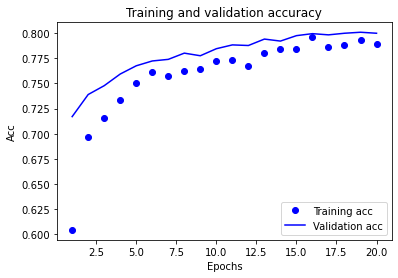

In [29]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# DNN modelo 4
Defining the model structure

In [30]:
from tensorflow.keras import models, layers

hidden = 64

model4 = models.Sequential()
model4.add(layers.Dense(hidden, activation='relu'))
model4.add(layers.Dropout(0.3))
model4.add(layers.Dense(hidden, activation='relu'))
model4.add(layers.Dropout(0.3))
model4.add(layers.Dense(hidden, activation='relu'))
model4.add(layers.Dropout(0.3))
model4.add(layers.Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [31]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [32]:
history = model4.fit(partial_X_train,
                    partial_Y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, Y_val))

results = model4.evaluate(X_test, Y_test, verbose = 0)
print(results)

Epoch 1/20
10/10 [==============================] - 1s 24ms/step - loss: 0.6686 - acc: 0.5642 - val_loss: 0.5765 - val_acc: 0.6898
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 0.6004 - acc: 0.6686 - val_loss: 0.5439 - val_acc: 0.7200
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5629 - acc: 0.7081 - val_loss: 0.5260 - val_acc: 0.7336
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5504 - acc: 0.7274 - val_loss: 0.5106 - val_acc: 0.7436
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 0.5304 - acc: 0.7294 - val_loss: 0.4992 - val_acc: 0.7496
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5243 - acc: 0.7362 - val_loss: 0.4888 - val_acc: 0.7520
Epoch 7/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5183 - acc: 0.7467 - val_loss: 0.4795 - val_acc: 0.7608
Epoch 8/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5126 - acc: 0.7

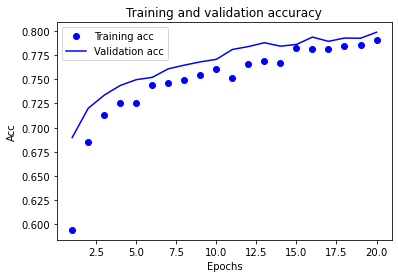

In [33]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()